In [15]:
# system packages 
import os 
import glob 
import pathlib as Path

# python data and visualization packages
import numpy as np
import natsort  # For natural sorting of file paths
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

# image processing packages 
import cv2
import imageio.v2 as imageio
import skimage.io
from skimage.transform import resize

# machine learning libraries
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
# Display
pd.set_option('display.float_format', '{:.2f}'.format)

#####
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
# image dataframe
# train_prq_path = "oil_spill_training_dataset.parquet"
# val_prq_path = "oil_spill_validation_dataset.parquet"
datasets_2 = "oil_spill_training_dataset-2.parquet"
# train_df = pd.read_parquet(train_prq_path)
# train_df = pd.read_parquet(val_prq_path)
df = pd.read_parquet(datasets_2)
# train_df.shape, val_df.shape, 
df.shape

(92160000, 5)

In [3]:
df.head(0)

,chnl_red,filter_red,ers_red,labels,glcm


In [5]:
class_counts = df['labels'].value_counts()
# Print the number of samples per class
print(class_counts)

0    81732526
1     6679422
2     1897974
3     1597893
4      252185
Name: labels, dtype: int64


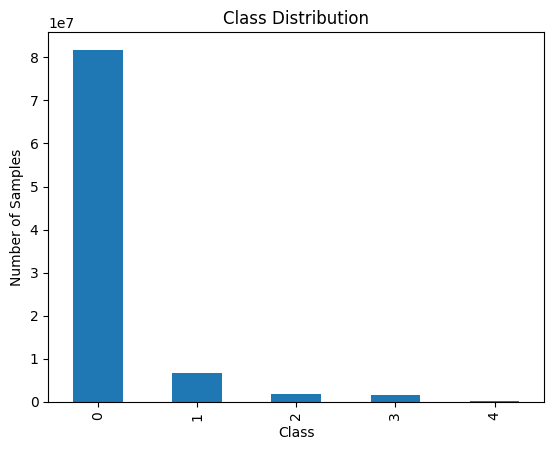

In [6]:
class_counts.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.title('Class Distribution')
plt.show()

In [10]:
#Resample data
#downsampling TRAINING DATA by reducing number of instaces in majority class ####may loss information
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(df[['chnl_red','filter_red','ers_red','glcm'
]], df['labels'])

In [11]:
# Create a new DataFrame from the resampled data
resampled_df = pd.DataFrame(data=X_resampled, columns=['chnl_red','filter_red','ers_red','glcm'])
resampled_df['labels'] = y_resampled

In [12]:
resampled_df

,chnl_red,filter_red,ers_red,glcm,labels
47548785,0.69,0.59,0.59,0.00,0
18563873,0.81,0.79,0.79,0.00,0
58202918,0.41,0.54,0.54,0.00,0
31974221,0.68,0.58,0.58,0.00,0
52447749,0.64,0.67,0.67,0.00,0
...,...,...,...,...,...
91730326,0.51,0.43,0.43,0.00,4
91730327,0.58,0.38,0.38,0.00,4
91730330,0.45,0.40,0.40,0.00,4
91730332,0.24,0.48,0.48,0.00,4


In [13]:
#define feature and target
X = resampled_df.drop('labels', axis=1)
y = resampled_df['labels']


In [16]:
#split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
rf_model = RandomForestClassifier(n_estimators= 500, max_depth= 50, max_samples= 1200, random_state=42)

In [53]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=50, max_samples=1200, n_estimators=500,
                       random_state=42)

In [36]:
# Extract feature importances
importances = rf_model.feature_importances_

In [49]:
y_pred = rf_model.predict(X_test)

In [50]:
from sklearn.metrics import classification_report
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [51]:
print(f'Accuracy: {accuracy:.2f}')
print("Confusion Matrix:\n", conf_matrix)
print('Classification Report:\n', report)

Accuracy: 0.44
Confusion Matrix:
 [[31766  7246  5606  3170  2459]
 [10188 25251  5041  4285  5755]
 [10553  1116 12332  9274 17329]
 [ 7894   217  9988 10877 21459]
 [ 3397    69  7996  7741 31176]]
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.63      0.56     50247
           1       0.74      0.50      0.60     50520
           2       0.30      0.24      0.27     50604
           3       0.31      0.22      0.25     50435
           4       0.40      0.62      0.49     50379

    accuracy                           0.44    252185
   macro avg       0.45      0.44      0.43    252185
weighted avg       0.45      0.44      0.43    252185



In [37]:
# Get the indices of features sorted by importance
indices = np.argsort(importances)[::-1]

In [38]:
# Get the feature names (assuming X_train is a DataFrame)
feature_names = X_train.columns

In [39]:
# Print feature ranking
print("Feature ranking:")
for f in range(X_train.shape[1]):
    print(f"{f + 1}. Feature {indices[f]} - {importances[indices[f]]}")

Feature ranking:
1. Feature 1 - 0.27837713337927666
2. Feature 0 - 0.2731092014960879
3. Feature 2 - 0.2725958892687336
4. Feature 3 - 0.17591777585590185


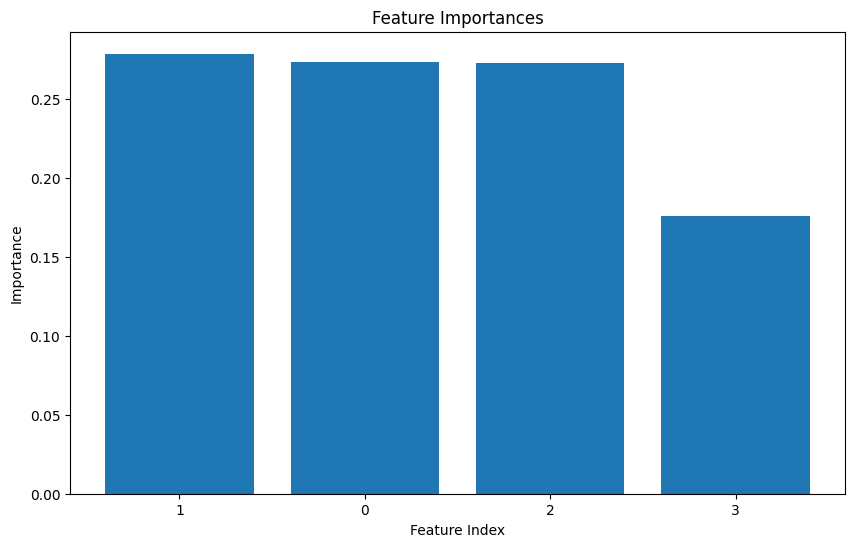

In [40]:
# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlabel("Feature Index")
plt.ylabel("Importance")
plt.show()

In [57]:
#upsampling by generating synthetic examples
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(df[['chnl_red','filter_red','ers_red','glcm']], df['labels'])

In [58]:
# Create a new DataFrame from the resampled data
upsampled_df = pd.DataFrame(data=X_resampled, columns=['chnl_red','filter_red','ers_red','glcm'])
upsampled_df['labels'] = y_resampled

In [61]:
upsampled_df

,chnl_red,filter_red,ers_red,glcm,labels
47548785,0.69,0.59,0.59,0.00,0
18563873,0.81,0.79,0.79,0.00,0
58202918,0.41,0.54,0.54,0.00,0
31974221,0.68,0.58,0.58,0.00,0
52447749,0.64,0.67,0.67,0.00,0
...,...,...,...,...,...
91730326,0.51,0.43,0.43,0.00,4
91730327,0.58,0.38,0.38,0.00,4
91730330,0.45,0.40,0.40,0.00,4
91730332,0.24,0.48,0.48,0.00,4


In [62]:
#define feature and target
X = upsampled_df.drop('labels', axis=1)
y = upsampled_df['labels']


In [63]:
#split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [64]:
rf_model = RandomForestClassifier(n_estimators= 500, max_depth= 50, random_state=42)

In [65]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=50, n_estimators=500, random_state=42)

In [ ]:
y_pred = rf_model.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [ ]:
print(f'Accuracy: {accuracy:.2f}')
print("Confusion Matrix:\n", conf_matrix)
print('Classification Report:\n', report)